In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [5]:
health_df = pd.read_csv(#file path)
health_df.head(30)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
health_df.shape

(1338, 7)

In [9]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
health_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
health_df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


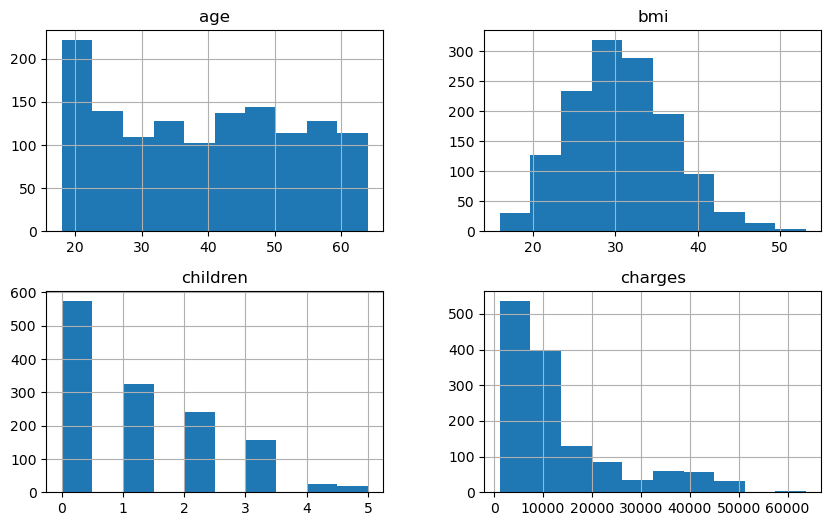

In [15]:
# EDA from this step
# Univariate Analysis
health_df.hist()
plt.show()

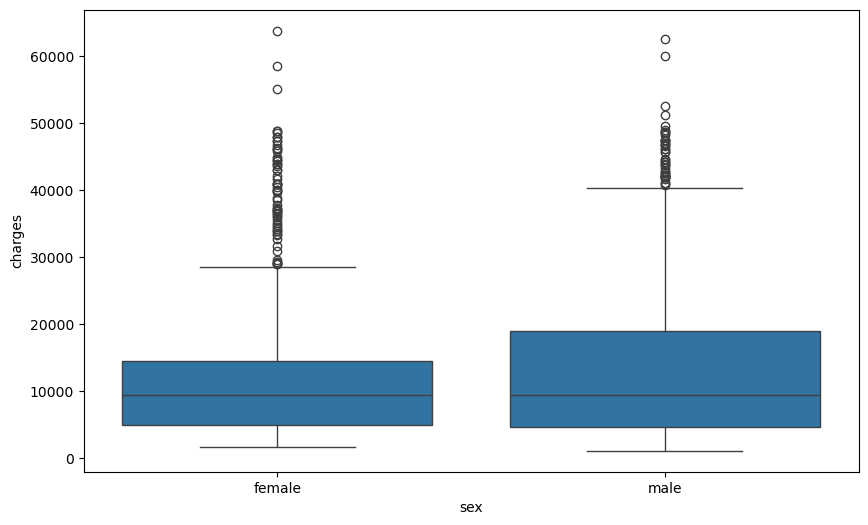

In [17]:
# Bivariate Analysis
# Visualization of the distribution of medical charges in connection with other factors like "sex" and "region"

sns.boxplot(x = 'sex', y = 'charges', data = health_df)
plt.show()

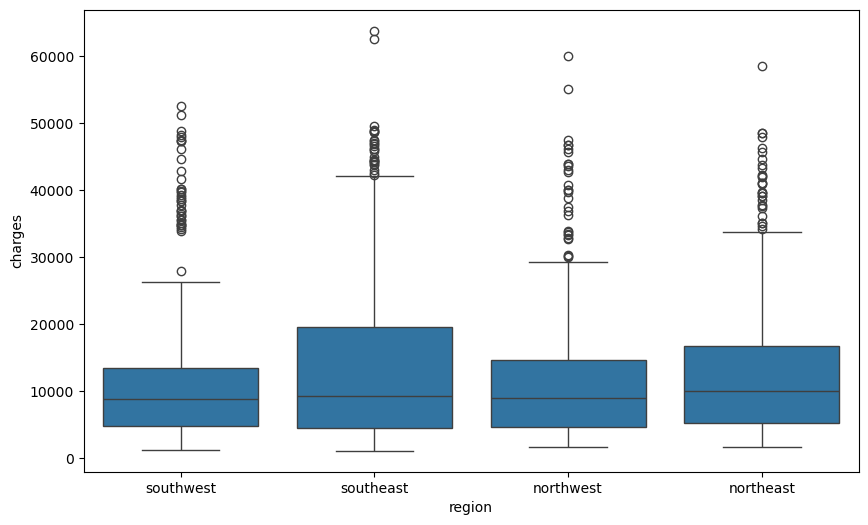

In [19]:
sns.boxplot(x = 'region', y = 'charges', data = health_df)
plt.show()

In [21]:
health_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

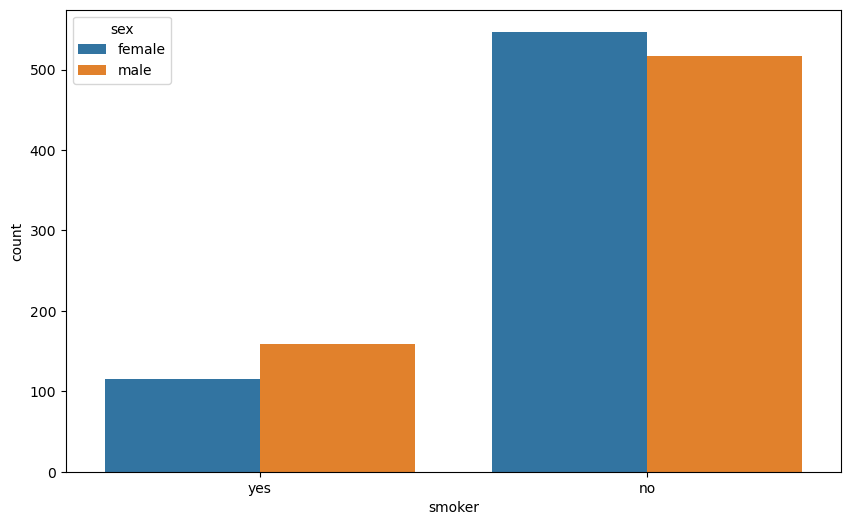

In [23]:
sns.countplot(x = 'smoker', hue = 'sex', data = health_df)
plt.show()

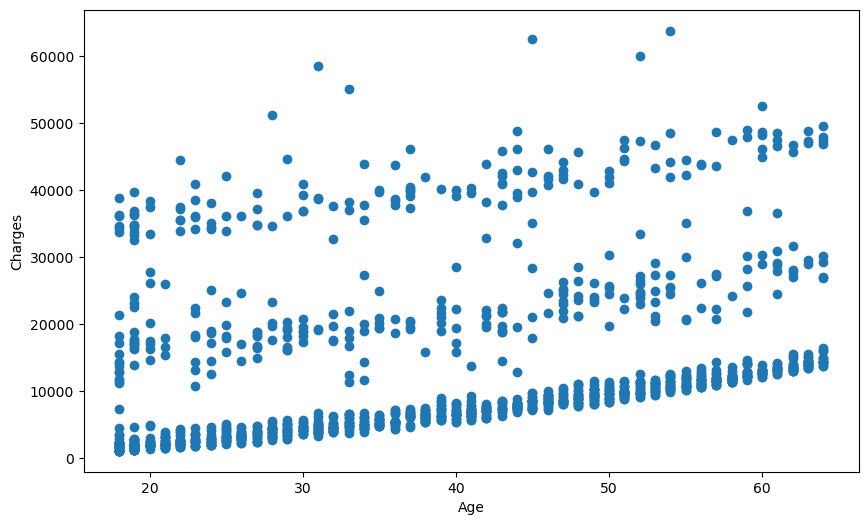

In [25]:
plt.scatter(x="age", y="charges", data=health_df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

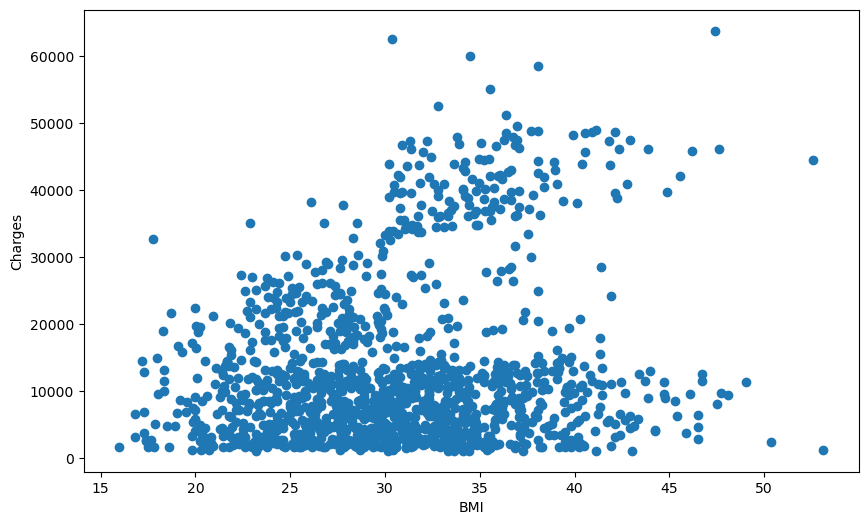

In [27]:
plt.scatter(x="bmi", y="charges", data=health_df)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

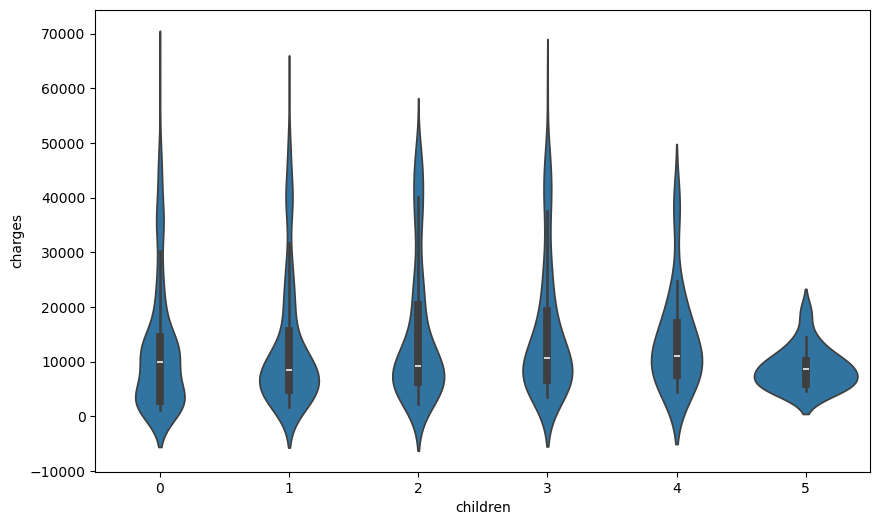

In [29]:
sns.violinplot(x="children", y="charges", data=health_df)
plt.show()

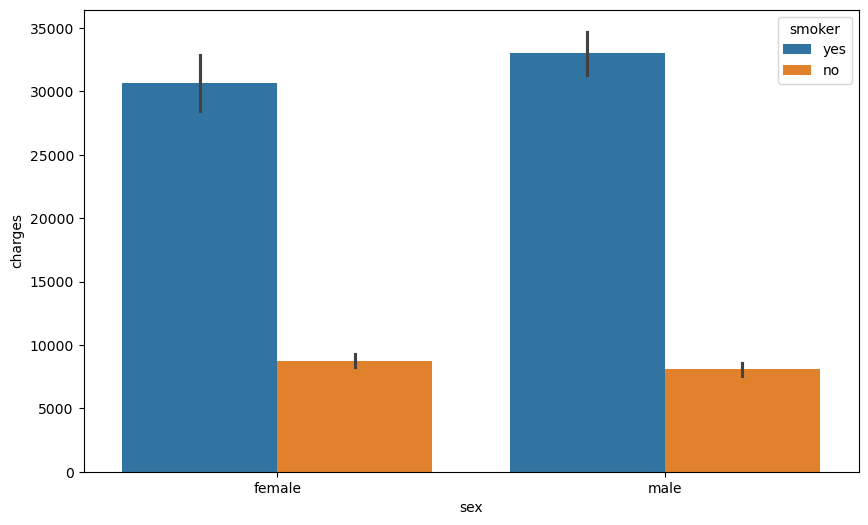

In [31]:
sns.barplot(x = 'sex',y = 'charges',hue = "smoker",data = health_df)
plt.show()

In [33]:
#import warnings
#warnings.filterwarnings('ignore')

health_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


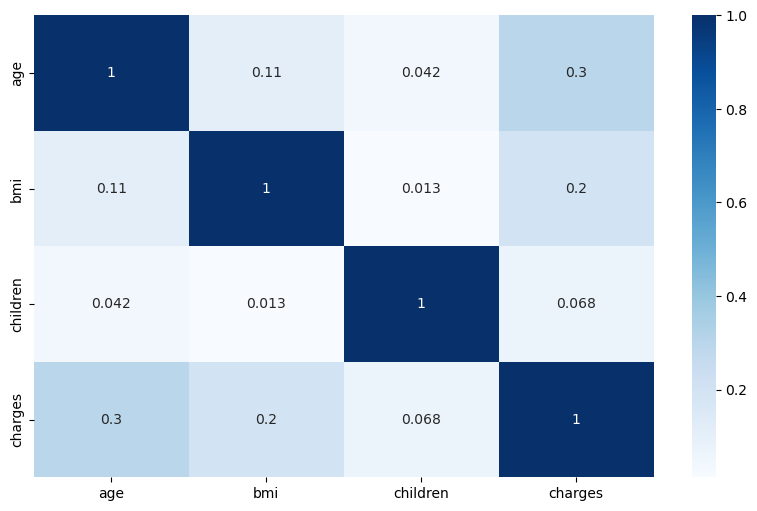

In [35]:
sns.heatmap(health_df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.show()

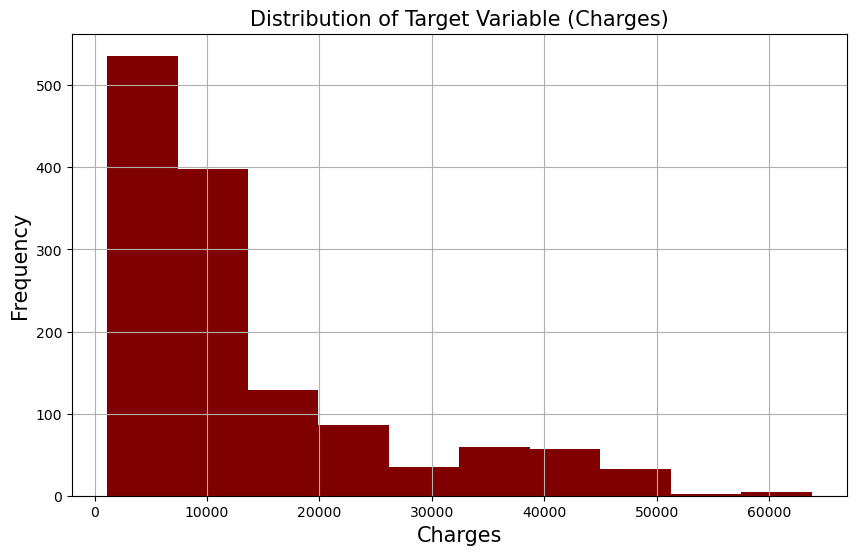

In [37]:
# check the distribution of target variable
health_df.charges.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Charges)', fontsize = 15)
plt.xlabel('Charges', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [39]:
health_df.charges.skew()

1.5158796580240388

In [41]:
#If the data is not normally distributed, use log transformation to reduce the skewness and get a near normally distributed data
health_df['log_charges'] = np.log(health_df["charges"])

# display the top 5 rows of the data
health_df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


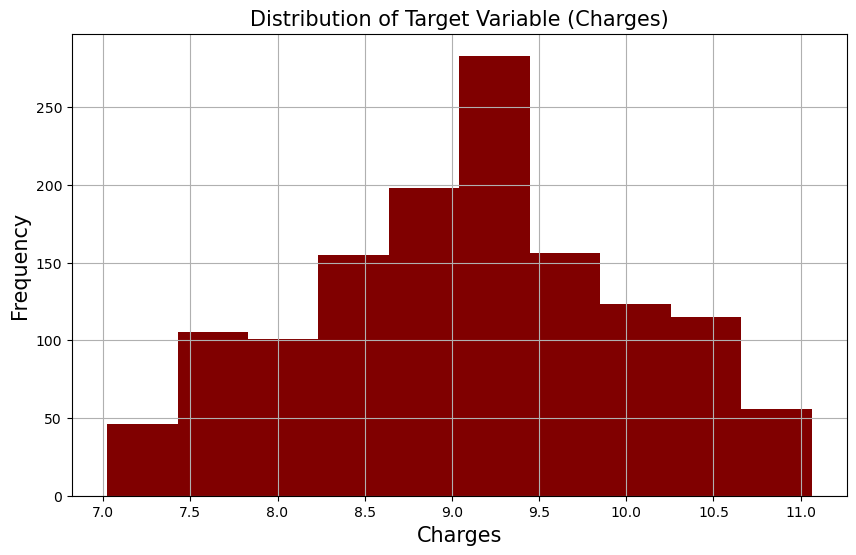

In [43]:
# check the distribution of target variable
health_df.log_charges.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Charges)', fontsize = 15)
plt.xlabel('Charges', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [45]:
health_df.log_charges.skew()

-0.09009752473024582

In [47]:
#Dummy Encode the Categorical Variables

# filter out the categorical variables and consider only the numeric variables using (include=np.number)
df_numeric_features = health_df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['age', 'bmi', 'children', 'charges', 'log_charges'], dtype='object')

In [49]:
# filter out the numerical variables and consider only the categorical variables using (include=object)
df_categoric_features = health_df.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [51]:
#Dummy encode the catergorical variables
# to create the dummy variables  we use 'get_dummies()' from pandas 
# to create (n-1) dummy variables we use 'drop_first = True' 
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [53]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df_health_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_health_dummy.head()

,age,bmi,children,charges,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,False,True,False,False,True
1,18,33.770,1,1725.55230,7.453302,True,False,False,True,False
2,28,33.000,3,4449.46200,8.400538,True,False,False,True,False
3,33,22.705,0,21984.47061,9.998092,True,False,True,False,False
4,32,28.880,0,3866.85520,8.260197,True,False,True,False,False


In [55]:
df_health_dummy.shape

(1338, 10)

In [57]:
import statsmodels
import statsmodels.api as sm
#from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [59]:
#Linear Regression (OLS)
#Split the data into training and test sets
# add the intercept column using 'add_constant()'

df_health_dummy = sm.add_constant(df_health_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
X=df_health_dummy.drop(['charges','log_charges'],axis=1)
y=df_health_dummy[['charges','log_charges']]

In [61]:
X.columns

Index(['const', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [63]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (936, 9)
The shape of X_test is: (402, 9)
The shape of y_train is: (936, 2)
The shape of y_test is: (402, 2)


In [65]:
#Build model using sm.OLS().fit()
linreg_logmodel_full = sm.OLS(y_train['log_charges'], X_train.astype(int)).fit()

# print the summary output
print(linreg_logmodel_full.summary())

#Charges=7.1+0.03*age+0.01*bmi+0.09*children

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     364.8
Date:                Mon, 19 May 2025   Prob (F-statistic):          3.00e-280
Time:                        19:05:14   Log-Likelihood:                -584.27
No. Observations:                 936   AIC:                             1187.
Df Residuals:                     927   BIC:                             1230.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0986      0.087  

In [67]:
#Predict the values using test set
# predict the 'log_charges' using predict()
linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

In [69]:
# take the exponential of predictions using np.exp()
predicted_charges = np.exp(linreg_logmodel_full_predictions.astype(int))

# extract the 'Property_Sale_Price' values from the test data
actual_charges = y_test['charges']

In [71]:
#Compute accuracy measures
# calculate rmse using rmse()
linreg_logmodel_full_rmse = rmse(actual_charges, predicted_charges)

# calculate R-squared using rsquared
linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_logmodel_full_rsquared_adj = linreg_logmodel_full.rsquared_adj 

In [73]:
#Tabulate the results
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the columns
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_logmodel_full_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_logmodel_full_rmse,
                     'R-Squared': linreg_logmodel_full_rsquared,
                     'Adj. R-Squared': linreg_logmodel_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels. If you want the concatenation to ignore existing
# indices, you can set the argument ignore_index=True. Then the resulting DataFrame
# index will be labeled with 0,1,2,....n-1.     
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation._append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,9409.320726,0.758947,0.756866
